# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np

In [5]:
penguins = load_penguins()
penguins = penguins.dropna(subset=['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species', 'island', 'sex'])
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [6]:
X = penguins.drop(columns=['bill_depth_mm'])  # Predictors
y = penguins['bill_depth_mm']                 # Target

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define different sets of predictor variables for each model
model_features = [
    ['bill_length_mm'],  # Model 1: Only bill length
    ['bill_length_mm', 'flipper_length_mm'],  # Model 2: Add flipper length
    ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'],  # Model 3: Add body mass
    X.columns.tolist()  # Model 4: All variables
]

# Initialize lists to store errors
train_errors = []
test_errors = []

# Train each model and compute errors
for features in model_features:
    # Select predictor variables
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    # Predict on both training and test sets
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)

    # Calculate mean squared error for training and test sets
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))


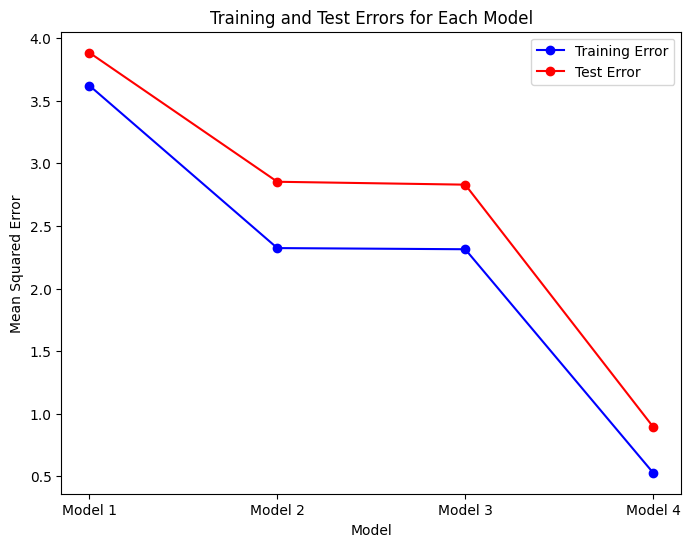

In [8]:
import matplotlib.pyplot as plt

# Plot training and test errors for each model
plt.figure(figsize=(8, 6))
model_labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
plt.plot(model_labels, train_errors, label='Training Error', marker='o', color='blue')
plt.plot(model_labels, test_errors, label='Test Error', marker='o', color='red')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors for Each Model')
plt.legend()
plt.show()


In [9]:
print("I think that Model 2 or 3 is the best. They have pretty much the same MSEs for both traning and validation. I would be suspicious of Model 4 because it is performing almost too well for both data sets.")

I think that Model 2 or 3 is the best. They have pretty much the same MSEs for both traning and validation. I would be suspicious of Model 4 because it is performing almost too well for both data sets.
